In [26]:
#from pyiron import Project
#from pyiron import ase_to_pyiron, pyiron_to_ase
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms
from scipy.optimize import curve_fit
#from pyiron import Project
#from pyiron import ase_to_pyiron, pyiron_to_ase
import shutil
import glob
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np 
import scipy.constants as const
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

In [27]:
# Diffusion tensor, crystal to grain diffusion  
d_523 = [[2.661e-10,-2.442e-12,-3.188e-12],
         [-2.442e-12,2.125e-10,-3.188e-12],
         [-3.188e-12,-3.188e-12,3.660e-10]]

d_523_err = [[4.998e-14,1.295e-14,1.129e-14],
         [1.295e-14,2.316e-14,1.129e-14],
         [1.129e-14,1.129e-14,4.528e-14]]

d_573 = [[4.202e-10,7.027e-13,8.194e-13],
         [7.027e-13,3.368e-10,8.194e-13],
         [8.194e-13,8.194e-13,5.881e-10]]

d_573_err = [[5.815e-14,1.295e-14,1.129e-14],
         [1.295e-14,6.464e-14,1.129e-14],
         [1.129e-14,1.129e-14,6.173e-14]]

d_623 = [[5.297e-10,-1.102e-11,-2.956e-12],
         [-1.102e-11,4.413e-10,-2.956e-12],
         [-2.956e-12,-2.956e-12,7.575e-10]]

d_623_err = [[2.477e-12,7.789e-13,2.797e-12],
         [7.789e-13,1.666e-12,1.092e-12],
         [2.797e-12,1.092e-12,4.212e-12]]

d_673 = [[7.702e-10,7.031e-12,7.793e-12],
         [7.031e-12,5.961e-10,7.793e-12],
         [7.793e-12,7.793e-12,1.001e-09]]

d_673_err = [[1.172e-13,5.910e-14,4.444e-14],
         [5.910e-14,1.304e-13,4.444e-14],
         [4.444e-14,4.444e-14,2.065e-13]]

d_723 = [[9.499e-10,-5.382e-13,-1.242e-11],
         [-5.382e-13,7.161e-10,-1.242e-11],
         [-1.242e-11,-1.242e-11,1.210e-09]]

d_723_err = [[2.747e-13,3.335e-14,5.415e-14],
         [3.335e-14,2.096e-13,5.415e-14],
         [5.415e-14,5.415e-14,2.449e-13]]
         
d_773 = [[1.162e-09,-4.225e-12,-6.962e-12],
         [-4.225e-12,9.952e-10,-6.962e-12],
         [-6.962e-12,-6.962e-12,1.664e-09]]

d_773_err = [[3.119e-13,7.384e-14,1.015e-13],
         [7.384e-14,1.965e-13,1.015e-13],
         [1.015e-13,1.015e-13,3.164e-13]]

In [28]:
cry_x = [d_523[0][0],d_573[0][0],d_623[0][0],d_673[0][0],d_723[0][0],d_773[0][0]]
cry_y = [d_523[1][1],d_573[1][1],d_623[1][1],d_673[1][1],d_723[1][1],d_773[1][1]]
cry_z = [d_523[2][2],d_573[2][2],d_623[2][2],d_673[2][2],d_723[2][2],d_773[2][2]]
cry_tot = [(cry_x[0]+cry_y[0]+cry_z[0])/3,(cry_x[1]+cry_y[1]+cry_z[1])/3,(cry_x[2]+cry_y[2]+cry_z[2])/3,(cry_x[3]+cry_y[3]+cry_z[3])/3,(cry_x[4]+cry_y[4]+cry_z[4])/3,(cry_x[5]+cry_y[5]+cry_z[5])/3]

In [29]:
# Sigma 7 (11) twist IDP 02 
# 1. rotated tensor in cartesian coordinates
x_7_1_b = [2.660999999999998e-10, 4.202000000000001e-10, 5.297000000000006e-10, 7.702000000000001e-10, 9.499000000000002e-10, 1.162e-09]
y_7_1_b = [2.1249999999999986e-10, 3.3679999999999976e-10, 4.413000000000004e-10, 5.960999999999998e-10, 7.161000000000003e-10, 9.952000000000005e-10]
z_7_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_7_1_b = [2.8153333333333325e-10, 4.483666666666665e-10, 5.76166666666667e-10, 7.890999999999998e-10, 9.586666666666665e-10, 1.2737333333333336e-09]

# 2. GB diffusion tensor after using cricuit model
x_7_1_gb = [1.4543822330000006e-10, 3.3519445618999997e-10, 4.924168667499998e-10, 6.1916941658e-10, 8.7330010805e-10, 1.067097479e-09]
y_7_1_gb = [7.849813521350005e-11, 1.7289339942000007e-10, 2.7798045744499996e-10, 3.7348759692000005e-10, 5.133301581649999e-10, 6.308717896849999e-10]
z_7_1_gb = [5.4516301085723745e-11, 1.1821347687737873e-10, 2.1181303817967534e-10, 2.9356158732455236e-10, 4.223892706752241e-10, 4.4659829374993436e-10]
tot_7_1_gb = [9.281755319974129e-11, 2.0876711082912626e-10, 3.274034541248917e-10, 4.287395336081841e-10, 6.030065122967413e-10, 7.148558541449781e-10]

In [30]:
# Sigma 11, tilt IDP 06 
# 1. rotated tensor in cartesian coordinates
x_11_1_b = [2.4544807372959655e-10, 3.8360765693813006e-10, 5.025642051799674e-10, 6.883024436472518e-10, 8.498022977768286e-10, 1.0943909192105028e-09]
y_11_1_b = [2.331519262704031e-10, 3.733923430618698e-10, 4.684357948200335e-10, 6.779975563527482e-10, 8.161977022231718e-10, 1.0628090807894974e-09]
z_11_1_b = [3.660000000000001e-10, 5.880999999999998e-10, 7.575000000000001e-10, 1.0009999999999997e-09, 1.209999999999999e-09, 1.6640000000000003e-09]
tot_11_1_b = [2.8153333333333325e-10, 4.483666666666665e-10, 5.76166666666667e-10, 7.891e-10, 9.586666666666665e-10, 1.2737333333333334e-09]

# 2. GB diffusion tensor after using cricuit model
x_11_1_gb = [3.7908945936347993e-11, 5.7970340006104597e-11, 8.310061152515324e-11, 1.1057386867221313e-10, 1.2216400054187648e-10, 1.9863091999183095e-10]
y_11_1_gb = [1.4124941524232197e-10, 2.229280454112436e-10, 3.0629472932488224e-10, 4.3311629950339577e-10, 5.02021797790568e-10, 7.11465010311014e-10]
z_11_1_gb = [2.8109168553846073e-11, 3.178183190769237e-11, 1.3013993115384595e-10, 2.14237457323077e-10, 1.9827143826923146e-10, 3.659831814999997e-10]
tot_11_1_gb = [6.908917657750534e-11, 1.0422673910834687e-10, 1.731784240012938e-10, 2.526425418328953e-10, 2.7415241220055863e-10, 4.2535970393428154e-10]

In [31]:
# Sigma 7 and sigma 11 we need average diffusion along for 7 in xand y and for 11 in y and z

x_7_avg_xy = [(x_7_1_gb[i]+y_7_1_b[i])/2 for i in range(6)]
x_11_avg_yz = [(y_11_1_gb[i]+z_11_1_b[i])/2 for i in range(6)] 

x_7_bulk_xy = [(cry_x[i]+cry_y[i])/2 for i in range(6)]
x_11_bulk_yz = [(cry_y[i]+cry_z[i])/2 for i in range(6)]

print(x_7_avg_xy)
print(x_11_avg_yz)
print(x_7_bulk_xy)
print(x_11_bulk_yz)

[1.7896911164999996e-10, 3.359972280949999e-10, 4.668584333750001e-10, 6.076347082899999e-10, 7.947000540250002e-10, 1.0311487395000002e-09]
[2.53624707621161e-10, 4.0551402270562165e-10, 5.318973646624412e-10, 7.170581497516978e-10, 8.560108988952834e-10, 1.1877325051555071e-09]
[2.393e-10, 3.785e-10, 4.855e-10, 6.831500000000001e-10, 8.33e-10, 1.0786e-09]
[2.8925e-10, 4.6245e-10, 5.994e-10, 7.9855e-10, 9.630499999999999e-10, 1.3296e-09]


In [32]:
import scipy.constants as const
import sys  
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
import analysis_msd as ms

temp = [523,573,623,673,723,773]

t_1 = 1000 / np.array(temp)           # temperature
plusminus = u"\u00B1"

In [33]:
# x in all cases gb and bulk 

Ea_x_7_1_b_1, c_x_7_1_b_1, _x_7_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], x_7_1_b[0:3])
Ea_x_7_1_gb_1, c_x_7_1_gb_1, _x_7_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], x_7_1_gb[0:3])
Ea_x_11_1_b_1, c_x_11_1_b_1, _x_11_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], x_11_1_b[0:3])
Ea_x_11_1_gb_1, c_x_11_1_gb_1, _x_11_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], x_11_1_gb[0:3])

Ea_x_11_1_b_2, c_x_11_1_b_2, _x_11_1_b_2 = ms.msd.fit_arrhenius(temp[3:], x_11_1_b[3:])
Ea_x_11_1_gb_2, c_x_11_1_gb_2, _x_11_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], x_11_1_gb[3:])
Ea_x_7_1_b_2, c_x_7_1_b_2, _x_7_1_b_2 = ms.msd.fit_arrhenius(temp[3:], x_7_1_b[3:])
Ea_x_7_1_gb_2, c_x_7_1_gb_2, _x_7_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], x_7_1_gb[3:])

Ea_x_11_1_gb, c_x_11_1_gb, _x_11_1_gb = ms.msd.fit_arrhenius(temp, x_11_1_gb)


# Activation energy for diffusion in x direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion 

arr_x_7_1_b_1 = (c_x_7_1_b_1 * np.exp(-Ea_x_7_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_x_7_1_gb_1 = (c_x_7_1_gb_1 * np.exp(-Ea_x_7_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_x_11_1_b_1 = (c_x_11_1_b_1 * np.exp(-Ea_x_11_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_x_11_1_gb_1 = (c_x_11_1_gb_1 * np.exp(-Ea_x_11_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001

arr_x_11_1_b_2 = (c_x_11_1_b_2 * np.exp(-Ea_x_11_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_x_11_1_gb_2 = (c_x_11_1_gb_2 * np.exp(-Ea_x_11_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_x_7_1_b_2 = (c_x_7_1_b_2 * np.exp(-Ea_x_7_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_x_7_1_gb_2 = (c_x_7_1_gb_2 * np.exp(-Ea_x_7_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001

arr_x_11_1_gb = (c_x_11_1_gb * np.exp(-Ea_x_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001





In [34]:
# y in all cases gb and bulk

Ea_y_7_1_b_1, c_y_7_1_b_1, _y_7_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], y_7_1_b[0:3])
Ea_y_7_1_gb_1, c_y_7_1_gb_1, _y_7_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], y_7_1_gb[0:3])
Ea_y_11_1_b_1, c_y_11_1_b_1, _y_11_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], y_11_1_b[0:3])
Ea_y_11_1_gb_1, c_y_11_1_gb_1, _y_11_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], y_11_1_gb[0:3])


Ea_y_7_1_b_2, c_y_7_1_b_2, _y_7_1_b_2 = ms.msd.fit_arrhenius(temp[3:], y_7_1_b[3:])
Ea_y_7_1_gb_2, c_y_7_1_gb_2, _y_7_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], y_7_1_gb[3:])
Ea_y_11_1_b_2, c_y_11_1_b_2, _y_11_1_b_2 = ms.msd.fit_arrhenius(temp[3:], y_11_1_b[3:])
Ea_y_11_1_gb_2, c_y_11_1_gb_2, _y_11_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], y_11_1_gb[3:])

Ea_y_11_1_gb, c_y_11_1_gb, _y_11_1_gb = ms.msd.fit_arrhenius(temp, y_11_1_gb)

# Activation energy for diffusion in y direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_y_7_1_b_1 = (c_y_7_1_b_1 * np.exp(-Ea_y_7_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_y_7_1_gb_1 = (c_y_7_1_gb_1 * np.exp(-Ea_y_7_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_y_11_1_b_1 = (c_y_11_1_b_1 * np.exp(-Ea_y_11_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_y_11_1_gb_1 = (c_y_11_1_gb_1 * np.exp(-Ea_y_11_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001

arr_y_7_1_b_2 = (c_y_7_1_b_2 * np.exp(-Ea_y_7_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_y_7_1_gb_2 = (c_y_7_1_gb_2 * np.exp(-Ea_y_7_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_y_11_1_b_2 = (c_y_11_1_b_2 * np.exp(-Ea_y_11_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_y_11_1_gb_2 = (c_y_11_1_gb_2 * np.exp(-Ea_y_11_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001

arr_y_11_1_gb, c_y_11_1_gb, _y_11_1_gb = ms.msd.fit_arrhenius(temp, y_11_1_gb)


In [35]:
# z in all cases gb and bulk

Ea_z_7_1_b_1, c_z_7_1_b_1, _z_7_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], z_7_1_b[0:3])
Ea_z_7_1_gb_1, c_z_7_1_gb_1, _z_7_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], z_7_1_gb[0:3])
Ea_z_11_1_b_1, c_z_11_1_b_1, _z_11_1_b_1 = ms.msd.fit_arrhenius(temp[0:3], z_11_1_b[0:3])
Ea_z_11_1_gb_1, c_z_11_1_gb_1, _z_11_1_gb_1 = ms.msd.fit_arrhenius(temp[0:3], z_11_1_gb[0:3])

Ea_z_7_1_b_2, c_z_7_1_b_2, _z_7_1_b_2 = ms.msd.fit_arrhenius(temp[3:], z_7_1_b[3:])
Ea_z_7_1_gb_2, c_z_7_1_gb_2, _z_7_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], z_7_1_gb[3:])
Ea_z_11_1_b_2, c_z_11_1_b_2, _z_11_1_b_2 = ms.msd.fit_arrhenius(temp[3:], z_11_1_b[3:])
Ea_z_11_1_gb_2, c_z_11_1_gb_2, _z_11_1_gb_2 = ms.msd.fit_arrhenius(temp[3:], z_11_1_gb[3:])

# Activation energy for diffusion in z direction
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_z_7_1_b_1 = (c_z_7_1_b_1 * np.exp(-Ea_z_7_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_z_7_1_gb_1 = (c_z_7_1_gb_1 * np.exp(-Ea_z_7_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_z_11_1_b_1 = (c_z_11_1_b_1 * np.exp(-Ea_z_11_1_b_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001
arr_z_11_1_gb_1 = (c_z_11_1_gb_1 * np.exp(-Ea_z_11_1_gb_1 / (const.k / const.e * np.array(temp[0:3]))))*0.0001

arr_z_7_1_b_2 = (c_z_7_1_b_2 * np.exp(-Ea_z_7_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_z_7_1_gb_2 = (c_z_7_1_gb_2 * np.exp(-Ea_z_7_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_z_11_1_b_2 = (c_z_11_1_b_2 * np.exp(-Ea_z_11_1_b_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001
arr_z_11_1_gb_2 = (c_z_11_1_gb_2 * np.exp(-Ea_z_11_1_gb_2 / (const.k / const.e * np.array(temp[3:]))))*0.0001

In [36]:
# avg value of 

Ea_7_avg_1 = (Ea_x_7_1_gb_1 + Ea_y_7_1_gb_1)/2
Ea_11_avg_1 = (Ea_y_11_1_gb_1 + Ea_z_11_1_gb_1)/2

Ea_7_avg_2 = (Ea_x_7_1_gb_2 + Ea_y_7_1_gb_2)/2
Ea_11_avg_2 = (Ea_y_11_1_gb_2 + Ea_z_11_1_gb_2)/2

c_7_avg_1 = (c_x_7_1_gb_1 + c_y_7_1_gb_1)/2
c_11_avg_1 = (c_y_11_1_gb_1 + c_z_11_1_gb_1)/2

c_7_avg_2 = (c_x_7_1_gb_2 + c_y_7_1_gb_2)/2
c_11_avg_2 = (c_y_11_1_gb_2 + c_z_11_1_gb_2)/2

_x_7_avg_1 = (_x_7_1_gb_1 + _y_7_1_gb_1)/2
_x_11_avg_1 = (_y_11_1_gb_1 + _z_11_1_gb_1)/2

_x_7_avg_2 = (_x_7_1_gb_2 + _y_7_1_gb_2)/2
_x_11_avg_2 = (_y_11_1_gb_2 + _z_11_1_gb_2)/2

# Activation energy for diffusion in x direction

arr_7_avg_1 = (arr_x_7_1_gb_1 + arr_y_7_1_gb_1)/2
arr_11_avg_1 = (arr_y_11_1_gb_1 + arr_z_11_1_gb_1)/2

arr_7_avg_2 = (arr_x_7_1_gb_2 + arr_y_7_1_gb_2)/2
arr_11_avg_2 = (arr_y_11_1_gb_2 + arr_z_11_1_gb_2)/2

print('---------------------------------')
print(arr_7_avg_1, arr_11_avg_1)
print(Ea_7_avg_1, Ea_11_avg_1)
print('---------------------------------')
print(arr_7_avg_2, arr_11_avg_2)
print(Ea_7_avg_2, Ea_11_avg_2)
print('---------------------------------')
print(Ea_z_7_1_gb_1, Ea_z_7_1_gb_2)
print(Ea_y_11_1_gb_1, Ea_y_11_1_gb_2)

---------------------------------
[1.17100215e-10 2.30254700e-10 4.06220658e-10] [8.27197698e-11 1.34345735e-10 2.05461680e-10]
0.3509662875718125 0.31831490027199016
---------------------------------
[5.03645159e-10 6.71825576e-10 8.63397522e-10] [3.04509534e-10 3.97753577e-10 5.01921858e-10]
0.2404477649836687 0.2263153040653612
---------------------------------
0.3816620782450759 0.1909732018944759
0.2179067725401096 0.22007108933514374


In [37]:
# total in all cases gb and bulk
Ea_tot_7_1_b, c_tot_7_1_b, _tot_7_1_b = ms.msd.fit_arrhenius(temp, tot_7_1_b)
Ea_tot_7_1_gb, c_tot_7_1_gb, _tot_7_1_gb = ms.msd.fit_arrhenius(temp, tot_7_1_gb)
Ea_tot_11_1_b, c_tot_11_1_b, _tot_11_1_b = ms.msd.fit_arrhenius(temp, tot_11_1_b)
Ea_tot_11_1_gb, c_tot_11_1_gb, _tot_11_1_gb = ms.msd.fit_arrhenius(temp, tot_11_1_gb)


# Activation energy for total diffusion
#arr_o = (c_o * np.exp(-Ea_o / (const.k / const.e * np.array(temp))))*0.0001   # get log of diffusion
arr_tot_7_1_b = (c_tot_7_1_b * np.exp(-Ea_tot_7_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_7_1_gb = (c_tot_7_1_gb * np.exp(-Ea_tot_7_1_gb / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_11_1_b = (c_tot_11_1_b * np.exp(-Ea_tot_11_1_b / (const.k / const.e * np.array(temp))))*0.0001
arr_tot_11_1_gb = (c_tot_11_1_gb * np.exp(-Ea_tot_11_1_gb / (const.k / const.e * np.array(temp))))*0.0001


In [38]:
# real bulk 
Ea_cry_x, c_cry_x, _cry_x = ms.msd.fit_arrhenius(temp, cry_x)
Ea_cry_y, c_cry_y, _cry_y = ms.msd.fit_arrhenius(temp, cry_y)
Ea_cry_z, c_cry_z, _cry_z = ms.msd.fit_arrhenius(temp, cry_z)
Ea_cry_tot, c_cry_tot, _cry_tot = ms.msd.fit_arrhenius(temp, cry_tot)

# Activation energy for diffusion in x direction
arr_cry_x = (c_cry_x * np.exp(-Ea_cry_x / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_y = (c_cry_y * np.exp(-Ea_cry_y / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_z = (c_cry_z * np.exp(-Ea_cry_z / (const.k / const.e * np.array(temp))))*0.0001
arr_cry_tot = (c_cry_tot * np.exp(-Ea_cry_tot / (const.k / const.e * np.array(temp))))*0.0001

In [39]:
print(Ea_y_11_1_gb_1, Ea_y_11_1_gb_2)

0.2179067725401096 0.22007108933514374


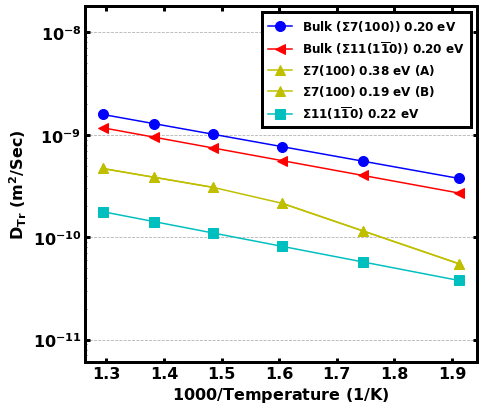

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3

plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

arr_z_7_1_gb_full = np.concatenate((arr_z_7_1_gb_1, arr_z_7_1_gb_2))

label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_y_11_1_gb)
#label_str_2 = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_y_11_1_gb_2)
label_str_x = r'$\Sigma 11(1\overline{{1}}0)$'
plt.errorbar(t_1, arr_cry_z, yerr=0, fmt='o-', markersize='10', elinewidth = 0, color='b', label='Bulk ($\Sigma 7 (100)$) {:0.2f} eV'.format(Ea_cry_z))
plt.errorbar(t_1, arr_cry_x, yerr=0, fmt='<-', markersize='10', elinewidth = 0, color='r', label='Bulk ($\Sigma 11(1\overline{{1}}0)$) {:.2f} eV'.format(Ea_cry_x))
#plt.errorbar(t_1, arr_z_5_1_b, yerr=0, fmt='<-', markersize='10', elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_z_5_1_b))
#plt.errorbar(t_1, arr_z_5_2_b, yerr=0, fmt='>-', markersize='10', elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_z_5_2_b))
plt.errorbar(t_1, arr_z_7_1_gb_full, yerr=0, fmt='^-', markersize='10', elinewidth=0, color='y')
plt.errorbar(t_1[0:3], arr_z_7_1_gb_1, yerr=0, fmt='^-', markersize='10', elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV (A)'.format(Ea_z_7_1_gb_1))
plt.errorbar(t_1[3:], arr_z_7_1_gb_2, yerr=0, fmt='^-', markersize='10', elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV (B)'.format(Ea_z_7_1_gb_2))
plt.errorbar(t_1, arr_x_11_1_gb, yerr=0, fmt='s-', markersize='10', elinewidth = 0, color='c', label=label_str)

#plt.errorbar(t_1, arr_z_13_1_b, yerr=0, fmt='v-', markersize='10', elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_z_13_1_b))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{D_{Tr}\ (m^2/Sec)}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
#plt.savefig('diffusion_z_bulk.png', dpi=600, bbox_inches='tight')
plt.show()

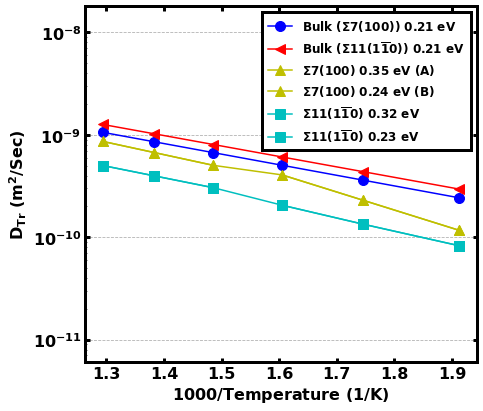

In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.style.use(['vaibhz-sci','no-latex'])

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,6)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3

plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

arr_avg_7_full = np.concatenate((arr_7_avg_1, arr_7_avg_2))
arr_avg_11_full = np.concatenate((arr_11_avg_1, arr_11_avg_2))

label_str = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_11_avg_1)
label_str_2 = r'$\Sigma 11(1\overline{{1}}0)$ {:.2f} eV'.format(Ea_11_avg_2)
ea_b = (Ea_cry_y+ Ea_cry_x)/2
label_str_x = r'$\Sigma 11(1\overline{{1}}0)$'
plt.errorbar(t_1, (arr_cry_x+arr_cry_y)/2, yerr=0, fmt='o-', markersize='10', elinewidth = 0, color='b', label='Bulk ($\Sigma 7 (100)$) {:0.2f} eV'.format((Ea_cry_x+ Ea_cry_y)/2))
plt.errorbar(t_1, (arr_cry_y+arr_cry_z)/2, yerr=0, fmt='<-', markersize='10', elinewidth = 0, color='r', label='Bulk ($\Sigma 11(1\overline{{1}}0)$) {:.2f} eV'.format(ea_b))
#plt.errorbar(t_1, arr_z_5_1_b, yerr=0, fmt='<-', markersize='10', elinewidth = 0, color='r', label='$\Sigma 5 (120)$ {:0.2f} eV'.format(Ea_z_5_1_b))
#plt.errorbar(t_1, arr_z_5_2_b, yerr=0, fmt='>-', markersize='10', elinewidth = 0, color='g', label='$\Sigma 5 (130)$ {:0.2f} eV'.format(Ea_z_5_2_b))
plt.errorbar(t_1, arr_avg_7_full, yerr=0, fmt='^-', markersize='10', elinewidth=0, color='y')
plt.errorbar(t_1[0:3], arr_7_avg_1, yerr=0, fmt='^-', markersize='10', elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV (A)'.format(Ea_7_avg_1))
plt.errorbar(t_1[3:], arr_7_avg_2, yerr=0, fmt='^-', markersize='10', elinewidth = 0, color='y', label='$\Sigma 7 (100)$ {:0.2f} eV (B)'.format(Ea_7_avg_2))
plt.errorbar(t_1, arr_avg_11_full, yerr=0, fmt='s-', markersize='10', elinewidth = 0, color='c')
plt.errorbar(t_1[0:3], arr_11_avg_1, yerr=0, fmt='s-', markersize='10', elinewidth = 0, color='c', label=label_str)
plt.errorbar(t_1[3:], arr_11_avg_2, yerr=0, fmt='s-', markersize='10', elinewidth = 0, color='c', label=label_str_2)
#plt.errorbar(t_1, arr_z_13_1_b, yerr=0, fmt='v-', markersize='10', elinewidth = 0, color='m', label='$\Sigma 13 (120)$ {:0.2f} eV'.format(Ea_z_13_1_b))
plt.yscale('log')
plt.grid(True, axis='y', linestyle='--')
plt.ylim(0.6e-11, 1.8e-8)
plt.xlabel("1000/$\mathrm{Temperature \ (1/K)}$", fontsize=16, fontweight='bold')
plt.ylabel("$\mathrm{D_{Tr}\ (m^2/Sec)}$", fontsize=16, fontweight='bold')
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.5, frameon=True, edgecolor="black", loc='upper right',fontsize=12,ncol=1)
#plt.savefig('diffusion_z_bulk.png', dpi=600, bbox_inches='tight')
plt.show()

In [42]:
print('---------------------------------')
print(arr_7_avg_1, arr_11_avg_1)
print(Ea_7_avg_1, Ea_11_avg_1)
print('---------------------------------')
print(arr_7_avg_2, arr_11_avg_2)
print(Ea_7_avg_2, Ea_11_avg_2)
print('---------------------------------')
print(Ea_z_7_1_gb_1, Ea_z_7_1_gb_2)
print(Ea_y_11_1_gb_1, Ea_y_11_1_gb_2)

---------------------------------
[1.17100215e-10 2.30254700e-10 4.06220658e-10] [8.27197698e-11 1.34345735e-10 2.05461680e-10]
0.3509662875718125 0.31831490027199016
---------------------------------
[5.03645159e-10 6.71825576e-10 8.63397522e-10] [3.04509534e-10 3.97753577e-10 5.01921858e-10]
0.2404477649836687 0.2263153040653612
---------------------------------
0.3816620782450759 0.1909732018944759
0.2179067725401096 0.22007108933514374


In [57]:
# pre-exponetial factor for all cases

# Perpendicular to GB
act_perp_0 = [Ea_z_7_1_gb_1, Ea_x_11_1_gb]
act_perp_1 = [Ea_z_7_1_gb_2, Ea_x_11_1_gb]
pre_expo_perp_0 = [ c_z_7_1_gb_1*0.0001, c_x_11_1_gb*0.0001]
pre_expo_perp_1 = [ c_z_7_1_gb_2*0.0001, c_x_11_1_gb*0.0001]
act_pr_1_0 = [Ea_7_avg_1, Ea_11_avg_1, ]
pre_expo_pr_1_0 = [ c_7_avg_1*0.0001,  c_11_avg_1*0.0001]
act_pr_1_1 = [ Ea_7_avg_2,  Ea_11_avg_2]
pre_expo_pr_1_1 = [  c_7_avg_2*0.0001,  c_11_avg_2*0.0001]

# bulk 
act_perp_c = [ Ea_cry_z, Ea_cry_x]
pre_expo_perp_c = [ c_cry_z*0.0001, c_cry_x*0.0001]
act_pr_1_c = [Ea_cry_x, Ea_cry_y]
pre_expo_pr_1_c = [ c_cry_x*0.0001, c_cry_y*0.0001]
act_pr_2_c = [Ea_cry_y, Ea_cry_z]

print('---------------------------------GB')
print(act_perp, pre_expo_perp)
print(act_pr_1, pre_expo_pr_1)

print('---------------------------------Bulk')
print(act_perp, pre_expo_perp)
print(act_pr_1, pre_expo_pr_1)
print(act_pr_2, pre_expo_perp_2)
print('---------------------------------')

---------------------------------GB
[0.3816620782450759, 0.1909732018944759, 0.2155995898740846] [2.624820537563886e-07, 8.252421765364142e-09, 4.520665250560901e-09]
[0.3509662875718125, 0.2404477649836687, 0.31831490027199016, 0.2263153040653612] [2.7338599855909604e-07, 3.2563972343777484e-08, 1.3176552890895537e-07, 1.4562187606291104e-08]
---------------------------------Bulk
[0.3816620782450759, 0.1909732018944759, 0.2155995898740846] [2.624820537563886e-07, 8.252421765364142e-09, 4.520665250560901e-09]
[0.3509662875718125, 0.2404477649836687, 0.31831490027199016, 0.2263153040653612] [2.7338599855909604e-07, 3.2563972343777484e-08, 1.3176552890895537e-07, 1.4562187606291104e-08]
[0.2057890808646556, 0.20055304797193035] [2.2161931040015401e-07, 2.203193090533697e-08, 2.4556374492892056e-07, 1.0555760333816452e-08]
---------------------------------


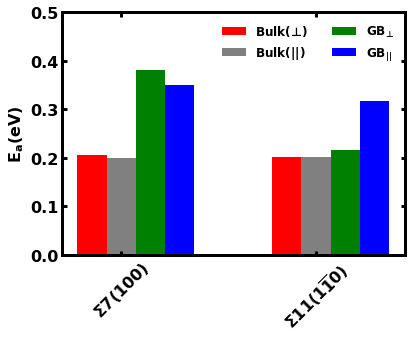

In [58]:
# Plot activation energies along x, y and z directions for all GBs a bar chart relative to bulk values

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.15

name = ['$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, [ Ea_z_7_1_b_1, Ea_x_11_1_b_1], color='r', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(\mathrm{{⊥}})}$')
plt.bar(r2, [ (Ea_y_7_1_b_1+Ea_x_7_1_b_1)/2, (Ea_y_11_1_b_1+Ea_z_11_1_b_1)/2], color='grey', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(||)}$')
plt.bar(r3, act_perp_0, color='g', width=barWidth, edgecolor='none', label='$\mathrm{GB_{⊥}}$')
plt.bar(r4, act_pr_1_0, color='b', width=barWidth, edgecolor='none', label='$\mathrm{GB_{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{E_{a} (eV)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
plt.ylim(0, 0.5)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=2, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
#plt.savefig('activation.png', dpi=600, bbox_inches='tight')
plt.show()

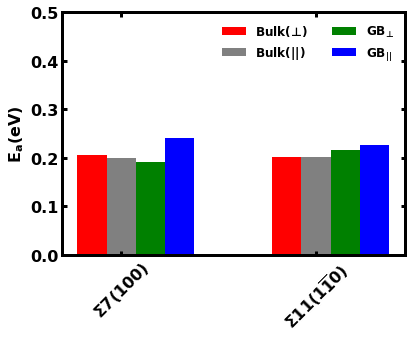

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.15

name = ['$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, [ Ea_z_7_1_b_1, Ea_x_11_1_b_1], color='r', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(\mathrm{{⊥}})}$')
plt.bar(r2, [ (Ea_y_7_1_b_1+Ea_x_7_1_b_1)/2, (Ea_y_11_1_b_1+Ea_z_11_1_b_1)/2], color='grey', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(||)}$')
plt.bar(r3, act_perp_1, color='g', width=barWidth, edgecolor='none', label='$\mathrm{GB_{⊥}}$')
plt.bar(r4, act_pr_1_1, color='b', width=barWidth, edgecolor='none', label='$\mathrm{GB_{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{E_{a} (eV)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
plt.ylim(0, 0.5)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=2, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()

# Display the plot
plt.tight_layout()
#plt.savefig('activation.png', dpi=600, bbox_inches='tight')
plt.show()

In [61]:
# pre-exponetial factor for all cases

# Perpendicular to GB
act_perp_0 = [Ea_z_7_1_gb_1, Ea_x_11_1_gb]
act_perp_1 = [Ea_z_7_1_gb_2, Ea_x_11_1_gb]
pre_expo_perp_0 = [ c_z_7_1_gb_1*0.0001, c_x_11_1_gb*0.0001]
pre_expo_perp_1 = [ c_z_7_1_gb_2*0.0001, c_x_11_1_gb*0.0001]
act_pr_1_0 = [Ea_7_avg_1, Ea_11_avg_1, ]
pre_expo_pr_1_0 = [ c_7_avg_1*0.0001,  c_11_avg_1*0.0001]
act_pr_1_1 = [ Ea_7_avg_2,  Ea_11_avg_2]
pre_expo_pr_1_1 = [  c_7_avg_2*0.0001,  c_11_avg_2*0.0001]

# bulk 
act_perp_c = [ Ea_cry_z, Ea_cry_x]
pre_expo_perp_c = [ c_cry_z*0.0001, c_cry_x*0.0001]
act_pr_1_c = [Ea_cry_x, Ea_cry_y]
pre_expo_pr_1_c = [ c_cry_x*0.0001, c_cry_y*0.0001]
act_pr_2_c = [Ea_cry_y, Ea_cry_z]

print('---------------------------------GB')
print(act_perp, pre_expo_perp)
print(act_pr_1, pre_expo_pr_1)

print('---------------------------------Bulk')
print(act_perp, pre_expo_perp)
print(act_pr_1, pre_expo_pr_1)
print(act_pr_2, pre_expo_perp_2)
print('---------------------------------')

---------------------------------GB
[0.3816620782450759, 0.1909732018944759, 0.2155995898740846] [2.624820537563886e-07, 8.252421765364142e-09, 4.520665250560901e-09]
[0.3509662875718125, 0.2404477649836687, 0.31831490027199016, 0.2263153040653612] [2.7338599855909604e-07, 3.2563972343777484e-08, 1.3176552890895537e-07, 1.4562187606291104e-08]
---------------------------------Bulk
[0.3816620782450759, 0.1909732018944759, 0.2155995898740846] [2.624820537563886e-07, 8.252421765364142e-09, 4.520665250560901e-09]
[0.3509662875718125, 0.2404477649836687, 0.31831490027199016, 0.2263153040653612] [2.7338599855909604e-07, 3.2563972343777484e-08, 1.3176552890895537e-07, 1.4562187606291104e-08]
[0.2057890808646556, 0.20055304797193035] [2.2161931040015401e-07, 2.203193090533697e-08, 2.4556374492892056e-07, 1.0555760333816452e-08]
---------------------------------


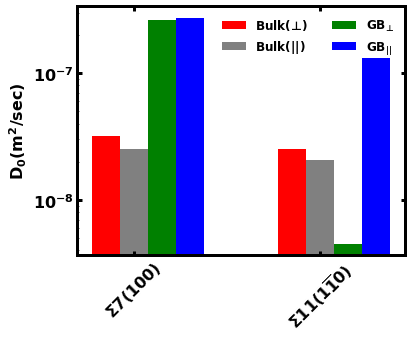

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.15

name = ['$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, pre_expo_perp_c, color='r', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(\mathrm{{⊥}})}$')
plt.bar(r2, pre_expo_pr_1_c, color='grey', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(||)}$')
plt.bar(r3, pre_expo_perp_0, color='g', width=barWidth, edgecolor='none', label='$\mathrm{GB_{⊥}}$')
plt.bar(r4, pre_expo_pr_1_0, color='b', width=barWidth, edgecolor='none', label='$\mathrm{GB_{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{D_{0} (m^2/sec)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
#plt.ylim(0, 0.5)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=2, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()
plt.yscale('log')
# Display the plot
plt.tight_layout()
#plt.savefig('activation.png', dpi=600, bbox_inches='tight')
plt.show()

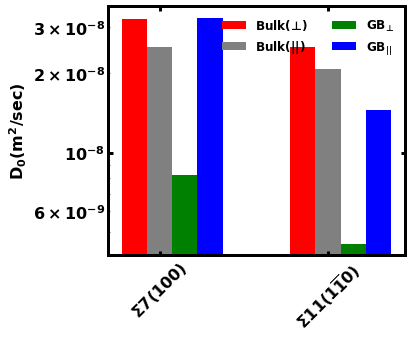

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([10e-12, 10e-8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)


# Set the width of the bars
barWidth = 0.15

name = ['$\Sigma 7 (100)$', '$\Sigma 11 (1\overline{1}0)$']

# for each name x, y, z relative to that of bulk

# Set position of bar on X axis
r1 = np.arange(len(name))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, pre_expo_perp_c, color='r', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(\mathrm{{⊥}})}$')
plt.bar(r2, pre_expo_pr_1_c, color='grey', width=barWidth, edgecolor='none', label='$\mathrm{Bulk(||)}$')
plt.bar(r3, pre_expo_perp_1, color='g', width=barWidth, edgecolor='none', label='$\mathrm{GB_{⊥}}$')
plt.bar(r4, pre_expo_pr_1_1, color='b', width=barWidth, edgecolor='none', label='$\mathrm{GB_{||}}$')
# Add xticks on the middle of the group bars
#plt.xlabel('GB', fontweight='bold')
#plt.grid(True, axis='y', linestyle='--')
# plot y ticks for 2 decimal places
plt.xticks([r + barWidth for r in range(len(name))], name, rotation=45)
plt.ylabel('$\mathrm{D_{0} (m^2/sec)}$', fontweight='bold', fontsize=16)
#plt.yticks(np.arange(0, 1, 0.15))
#plt.ylim(0, 0.5)
#plt.yticks(np.arange(0, 0.1, 0.05))
plt.legend(loc='best', frameon=False, ncol=2, fontsize=12)  # Adding legend to the best location with no frame and 1 column
#ax.legend()
plt.yscale('log')
# Display the plot
plt.tight_layout()
#plt.savefig('activation.png', dpi=600, bbox_inches='tight')
plt.show()